In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

import seaborn as sns

In [53]:
df = pd.read_csv("D:/!Рабочая/5 курс 1 семестр/Инт анализ данных/train.csv",sep=",")
df = df.astype({"satisfaction": str})

In [54]:
from sklearn.utils import shuffle
df = shuffle(df)
df = df.head(10000)

df = df.drop('Unnamed: 0', axis=1)
df = df.drop('id', axis=1)

In [55]:

df = df.dropna().copy()


In [56]:
df['satisfaction'] = pd.get_dummies(df['satisfaction'])
df['satisfaction']

53818     1
75653     1
6930      1
88251     0
59476     0
         ..
42567     1
102090    1
57596     1
8022      1
96065     1
Name: satisfaction, Length: 9970, dtype: uint8

In [57]:
df['Gender'] = pd.get_dummies(df['Gender'])
df['Customer Type'] = pd.get_dummies(df['Customer Type'])
df['Type of Travel'] = pd.get_dummies(df['Type of Travel'])
df['Class'] = pd.get_dummies(df['Class'])
df = df.drop('Gate location', axis=1)
df = df.drop('Gender', axis=1)
df = df.drop('Departure Delay in Minutes', axis=1)
df = df.drop('Departure/Arrival time convenient', axis=1)
df = df.drop('Arrival Delay in Minutes', axis=1)
df.dtypes

Customer Type             uint8
Age                       int64
Type of Travel            uint8
Class                     uint8
Flight Distance           int64
Inflight wifi service     int64
Ease of Online booking    int64
Food and drink            int64
Online boarding           int64
Seat comfort              int64
Inflight entertainment    int64
On-board service          int64
Leg room service          int64
Baggage handling          int64
Checkin service           int64
Inflight service          int64
Cleanliness               int64
satisfaction              uint8
dtype: object

In [58]:
continuousColumns = ["Cleanliness","Checkin service","Baggage handling","Leg room service","Online boarding","Customer Type","Age","On-board service","Type of Travel","Class","Inflight entertainment","Flight Distance", "Inflight service", "Seat comfort","Inflight wifi service","Ease of Online booking", "Food and drink"]


In [59]:
minMaxScaler = MinMaxScaler()
scaledColums = pd.DataFrame(minMaxScaler.fit_transform(df[continuousColumns]),columns=continuousColumns)

In [60]:
pca = PCA()
X_pca = pca.fit_transform(scaledColums)
exp_var_pca = pca.explained_variance_ratio_
cum_sum_eigenvalues = np.cumsum(exp_var_pca)

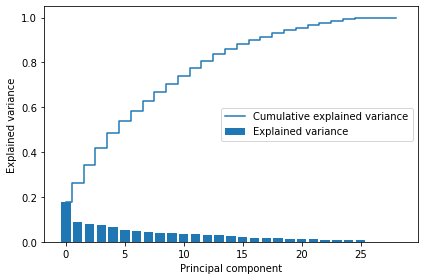

In [47]:
plt.bar(range(0,len(exp_var_pca)), exp_var_pca, align='center', label='Explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance')
plt.xlabel('Principal component')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [61]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df)

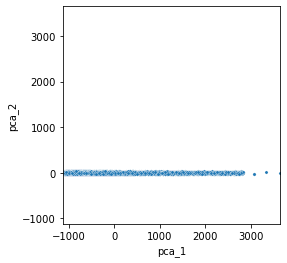

In [63]:
pca_result_df = pd.DataFrame({'pca_1': pca_result[:,0], 'pca_2': pca_result[:,1]})

fig, ax = plt.subplots(1)
sns.scatterplot(x='pca_1', y='pca_2', data=pca_result_df, ax=ax,s=10)
lim = (pca_result.min()-5, pca_result.max()+5)
ax.set_xlim(lim)
ax.set_ylim(lim)
ax.set_aspect('equal')

In [64]:
tsne = TSNE(n_components=2)
tsne_result = tsne.fit_transform(df)

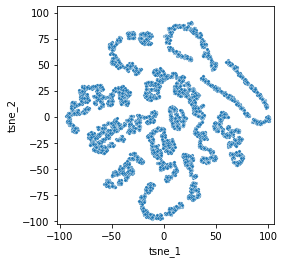

In [65]:
tsne_result_df = pd.DataFrame({'tsne_1': tsne_result[:,0], 'tsne_2': tsne_result[:,1]})

fig, ax = plt.subplots(1)
sns.scatterplot(x='tsne_1', y='tsne_2', data=tsne_result_df, ax=ax,s=10)
lim = (tsne_result.min()-5, tsne_result.max()+5)
ax.set_xlim(lim)
ax.set_ylim(lim)
ax.set_aspect('equal')